In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 1
%aimport plotter
%aimport

Concept list length: 400
Modules to reload:
plotter

Modules to skip:



In [2]:
import plotter

In [4]:
def key(file):
    "Node selection probability"
    if file.startswith("trivial_long") and file.endswith(".tsv") and (
        "_ipoisson100" in file or
        "_id199" in file or "_i100" in file) and "_n" not in file:
        if "_cone" in file:
            weight = "one"
        elif "_cdegree_squared" in file:
            weight = "degree_squared"
        elif "_cexp_degree" in file:
            weight = "exp_degree"
        elif "_cpreferential" in file:
            weight = "preferential"
        elif "_cdegree" in file:
            weight = "degree"
        elif "_c" not in file:
            weight = "degree_squared"
        else:
            return ValueError
        return weight


In [5]:
n, p, s = plotter.load(key)

In [6]:
labels = sorted(n.keys())

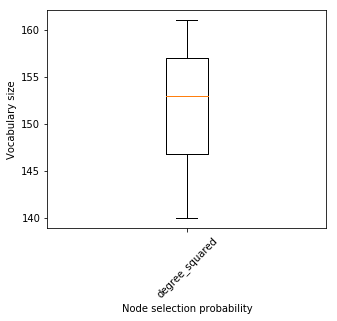

In [7]:
plotter.plot_something(n, labels, key.__doc__, "Vocabulary size")

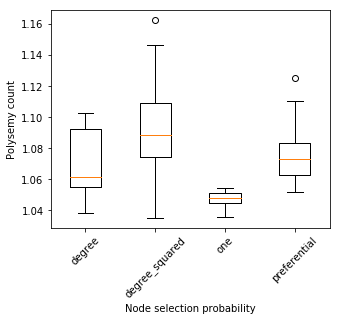

In [7]:
plotter.plot_something(p, labels, key.__doc__, "Polysemy count")

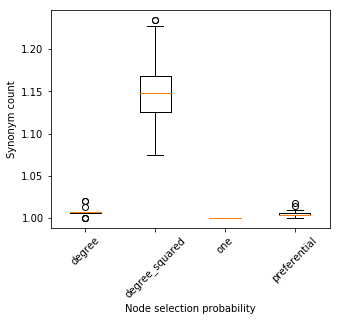

In [8]:
plotter.plot_something(s, labels, key.__doc__, "Synonym count")

trivial_long_branch_03_id199.tsv
trivial_long_branch_3_ipoisson100.tsv
trivial_long_branch_3_id199.tsv
trivial_long_branch_3_i100.tsv
trivial_long_branch_84_i100.tsv
trivial_long_branch_4_i100.tsv
trivial_long_branch_14_i100.tsv
trivial_long_branch_06_i100.tsv
trivial_long_branch_800_id199.tsv
trivial_long_branch_801_id199.tsv
trivial_long_branch_802_id199.tsv
trivial_long_branch_804_id199.tsv
trivial_long_branch_805_id199.tsv
trivial_long_branch_80_i100.tsv
trivial_long_branch_80_id199_cdegree_squared.tsv
trivial_long_branch_80_id199_cdegree.tsv
trivial_long_branch_80_id199_cone.tsv
trivial_long_branch_80_id199_cpreferential.tsv
trivial_long_branch_80_id199.tsv
trivial_long_branch_80_ipoisson100.tsv
trivial_long_branch_81_i100.tsv
trivial_long_branch_81_id199_cdegree_squared.tsv
trivial_long_branch_81_id199_cdegree.tsv
trivial_long_branch_81_id199_cone.tsv
trivial_long_branch_81_id199_cpreferential.tsv
trivial_long_branch_81_id199.tsv
trivial_long_branch_81_ipoisson100.tsv
trivial_lon

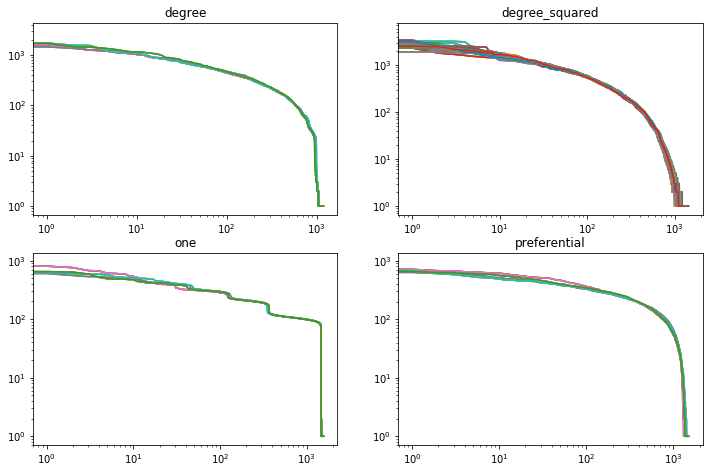

In [17]:
import pandas
import bisect
import matplotlib.pyplot as plt

import simuling.phylo.naminggame as ng
import networkx as nx
sem = nx.parse_gml(open("../simuling/phylo/network-3-families.gml"))
lang = ng.NamingGameLanguage(related_concepts=sem)

def accessibility_by_rank(all_data, wt):
    last_lg = max(all_data['Language_ID'])
    data = all_data[all_data['Language_ID'] == last_lg]
    for word, properties in data.groupby('Cognate_Set'):
        yield tuple(sem.node[str(f)]['Gloss'] for f in properties['Feature_ID']
                      ), properties['Weight'].sum()
        
for file in os.listdir('../evenmorerobustness'):
    if key(file) is not None:
        all_data = pandas.read_csv(
            os.path.join('../evenmorerobustness', file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        print(file)
        weight = key(file)
        for language_id, language_data in all_data.groupby("Language_ID"):
            if int(language_id) > 10**6:           
                plt.gcf().add_subplot(3, 2, [None,
                                       'degree',
                                       'degree_squared',
                                       'one',
                                       'preferential',
                                       'exp_degree'].index(weight))
                plt.gca().set_title(weight)
                plt.gca().set_xscale('log')
                plt.gca().set_yscale('log')
                w = []
                for word, wt in accessibility_by_rank(all_data, weight):
                    i = bisect.bisect(w, wt)
                    w.insert(i, wt)
                plt.plot(list(reversed(w)))

plt.gcf().set_size_inches(12,12)
plt.savefig("node_weight_zipf_test.pdf")